In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


### Importing data


In [472]:
original_data=pd.read_excel(r"C:\Users\abhis\OneDrive\Documents\bilkin_Assis\Problem Statement - Blinkit.xlsx")

In [473]:
original_data

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,ticket_id_new,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,us_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,1376,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,2035,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,2222,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,1788,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,2710,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,...,517,CA.5.45,finished,finished,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,...,3861,CA.5.44,finished,finished,DA.4.37,859,Samsung SM-G928F,0,0,NaN
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,...,1156,CA.5.45,finished,finished,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,...,651,CA.5.46,finished,finished,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0


In [474]:
original_data.isna().sum()

order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
us_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64

### droping unessary columns
 1.rider_app_version
 2. driver_device_uid_new
 3 device_name
 4 rider_app_version
 

In [475]:
dp_df1=original_data.drop(['device_name','driver_device_uid_new','driver_app_version','rider_app_version','ticket_id_new'],axis=1)

In [476]:
dp_df1.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,order_state,order_try_state,us_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,finished,finished,1,0,-1383.0
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,finished,finished,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,finished,finished,1,0,-166.0
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,finished,finished,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,finished,finished,0,0,NaN


### Droping Duplicate Values

In [477]:
dp_df1=dp_df1.drop_duplicates()

 ## Filing NUll and empty value
 

In [478]:
dp_df1.shape

(4270, 20)

In [479]:
dp_df1['change_reason_pricing']=dp_df1['change_reason_pricing'].fillna('change has not affected the predicted price')
dp_df1['fraud_score']=dp_df1['fraud_score'].fillna(0)


#### Finding the correlation between metered_price,upfront_price,distance and time

<Axes: >

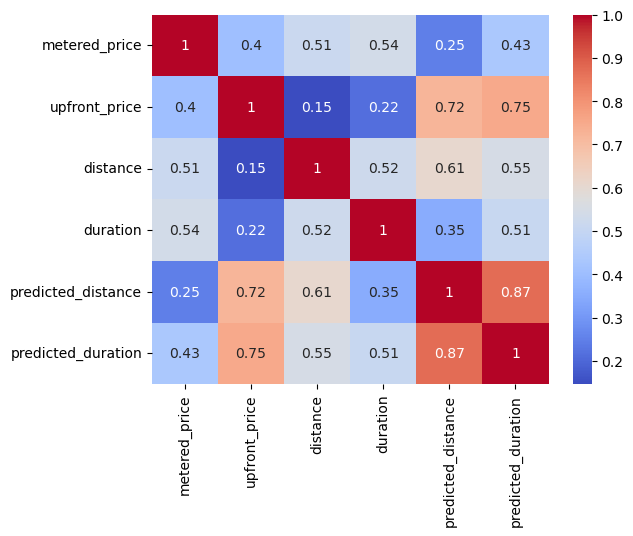

In [480]:
price_corr=['metered_price','upfront_price','distance','duration','predicted_distance','predicted_duration']
sns.heatmap(dp_df1[price_corr].corr(), annot=True,cmap="coolwarm")

In [481]:
dp_df1['calc_created_hour'] = pd.to_datetime(dp_df1['calc_created']).dt.hour
dp_df1['calc_created_second']=pd.to_datetime(dp_df1['calc_created']).dt.second
dp_df1['calc_created_min']=pd.to_datetime(dp_df1['calc_created']).dt.minute
dp_df1['calc_created_day'] = pd.to_datetime(dp_df1['calc_created']).dt.day
dp_df1['calc_created_month'] = pd.to_datetime(dp_df1['calc_created']).dt.month
dp_df1['calc_created_year']=pd.to_datetime(dp_df1['calc_created']).dt.year
dp_df1['calc_created_Weekday']=pd.to_datetime(dp_df1['calc_created']).dt.weekday
dp_df1["calc_created_Weekday"] = dp_df1["calc_created_Weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
dp_df1.loc[(dp_df1.calc_created_hour >= 6) & (dp_df1.calc_created_hour < 12) , 'time_of_day'] = 'Morning'
dp_df1.loc[(dp_df1.calc_created_hour >= 12) & (dp_df1.calc_created_hour < 15) , 'time_of_day'] = 'Afternoon'
dp_df1.loc[(dp_df1.calc_created_hour >= 15) & (dp_df1.calc_created_hour < 18) , 'time_of_day'] = 'Evening'
dp_df1.loc[(dp_df1.calc_created_hour >= 18) | (dp_df1.calc_created_hour < 6) , 'time_of_day'] = 'Night'

dp_df1.drop('calc_created',axis=1,inplace=True)

In [482]:
dp_df1.head()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,...,overpaid_ride_ticket,fraud_score,calc_created_hour,calc_created_second,calc_created_min,calc_created_day,calc_created_month,calc_created_year,calc_created_Weekday,time_of_day
0,22,22,4.04,10.0,2839,700,1,client,finished,1,...,0,-1383.0,3,31,37,2,2,2020,Sunday,Night
1,618,618,6.09,3.6,5698,493,1,client,finished,1,...,0,0.0,2,19,26,8,2,2020,Saturday,Night
2,657,657,4.32,3.5,4426,695,1,client,finished,1,...,0,-166.0,11,35,50,8,2,2020,Saturday,Morning
3,313,313,72871.72,NaN,49748,1400,0,client,finished,2,...,1,0.0,6,54,34,5,2,2020,Wednesday,Morning
4,1176,1176,20032.50,19500.0,10273,5067,1,client,finished,1,...,0,0.0,17,24,31,13,2,2020,Thursday,Evening


  calc_created_Weekday  metered_price
0               Friday    6946.911248
1               Monday    8432.936765
2             Saturday    6697.061764
3               Sunday    9208.977157
4             Thursday    6713.016107
5              Tuesday    6865.685356
6            Wednesday    7008.448346


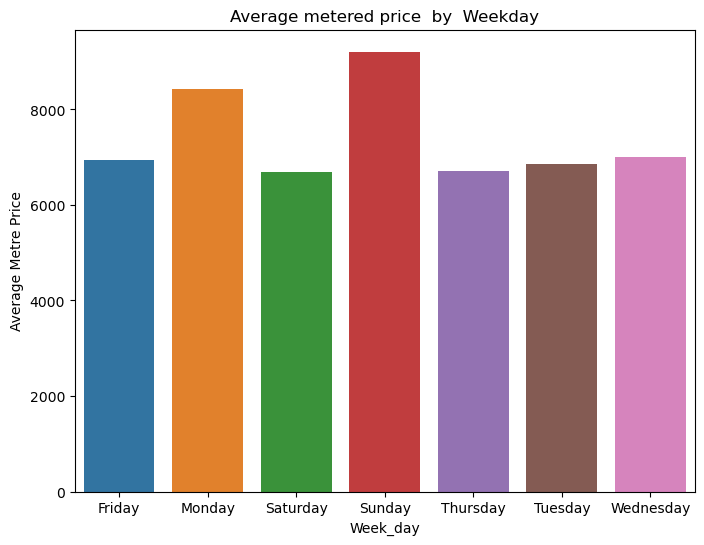

In [483]:
Merter_price = dp_df1.groupby('calc_created_Weekday')['metered_price'].mean().reset_index()
print(Merter_price)
plt.figure(figsize=(8, 6))
sns.barplot(data=Merter_price, x='calc_created_Weekday', y='metered_price')
plt.title('Average metered price  by  Weekday')
plt.xlabel('Week_day')
plt.ylabel('Average Metre Price')
plt.show()


  time_of_day  metered_price
0   Afternoon   10599.487451
1     Evening    6831.245578
2     Morning    7136.870236
3       Night    6684.730639


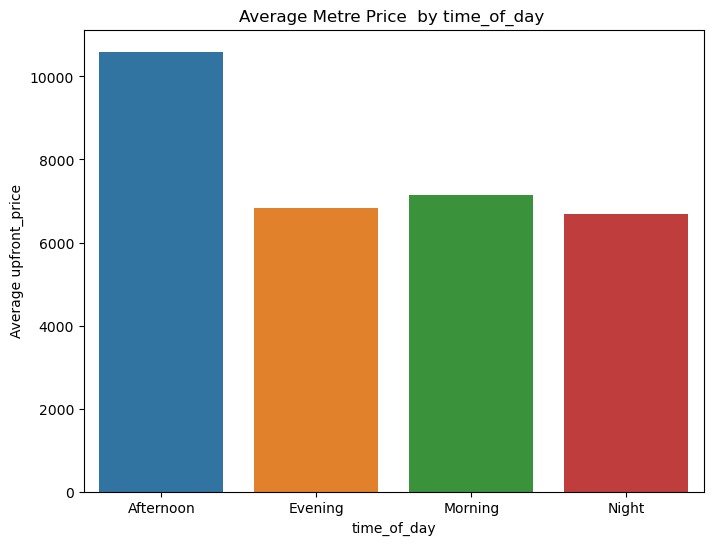

In [484]:
Merter_price = dp_df1.groupby('time_of_day')['metered_price'].mean().reset_index()
print(Merter_price)
plt.figure(figsize=(8, 6))
sns.barplot(data=Merter_price, x='time_of_day', y='metered_price')
plt.title('Average Metre Price  by time_of_day ')
plt.xlabel('time_of_day')
plt.ylabel('Average upfront_price')
plt.show()

In [485]:
dp_df2=dp_df1[dp_df1['metered_price'].isna()==False]
dp_df2=dp_df2[dp_df2['upfront_price'].isna()==False]

## Calculate Price Discrepancy

In [486]:
dp_df2['price_diff_pct']=(np.abs(dp_df2['metered_price']-dp_df2['upfront_price'])/dp_df2['upfront_price'])*100
dp_df2['discrepancy_flag']=dp_df2['price_diff_pct']>20
dp_df2['price_diff_pct'].describe()

count    2984.000000
mean       30.682526
std        58.033973
min         0.000000
25%         4.425441
50%        16.654625
75%        34.251152
max      1154.732387
Name: price_diff_pct, dtype: float64

# GPS Confidence Analysis

   gps_confidence  price_diff_pct
0               0       55.415778
1               1       14.151863


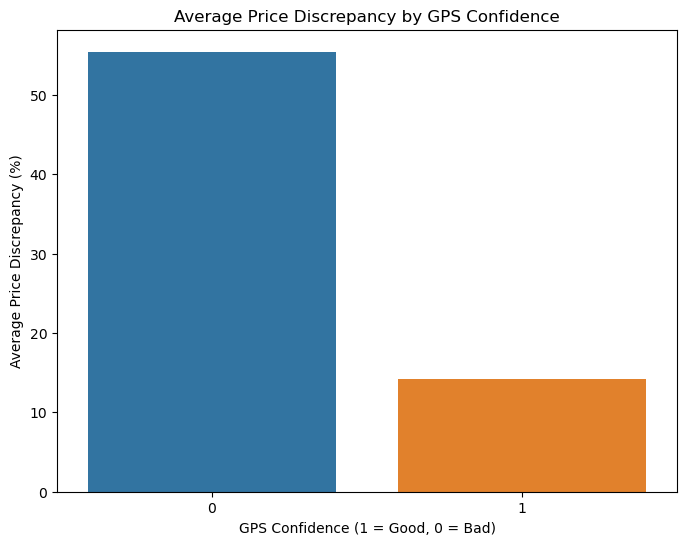

In [487]:
gps_discrepancy = dp_df2.groupby('gps_confidence')['price_diff_pct'].median().reset_index()
print(gps_discrepancy)
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=gps_discrepancy, x='gps_confidence', y='price_diff_pct')
plt.title('Average Price Discrepancy by GPS Confidence')
plt.xlabel('GPS Confidence (1 = Good, 0 = Bad)')
plt.ylabel('Average Price Discrepancy (%)')
plt.show()

   dest_change_number  price_diff_pct
0                   1       16.024845
1                   2       18.873239
2                   3       36.763728
3                   4       44.790761
4                   5        2.893103
5                   7       78.221525


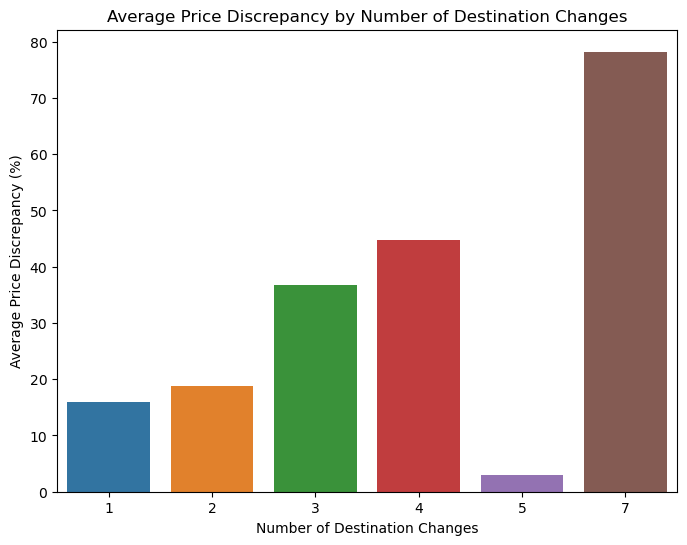

In [488]:
dest_change_discrepancy = dp_df2.groupby('dest_change_number')['price_diff_pct'].median().reset_index(drop=False)
print(dest_change_discrepancy)
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=dest_change_discrepancy, x='dest_change_number', y='price_diff_pct')
plt.title('Average Price Discrepancy by Number of Destination Changes')
plt.xlabel('Number of Destination Changes')
plt.ylabel('Average Price Discrepancy (%)')
plt.show()

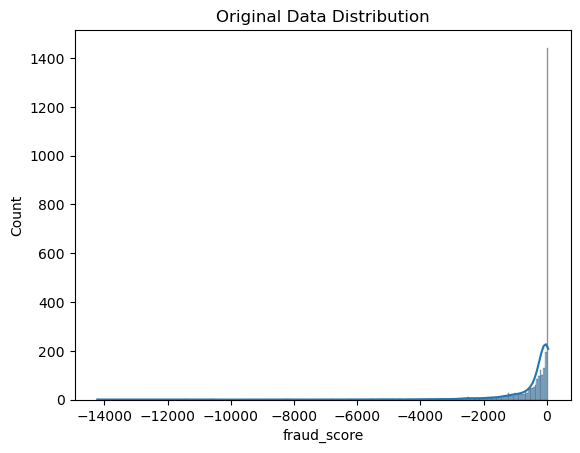

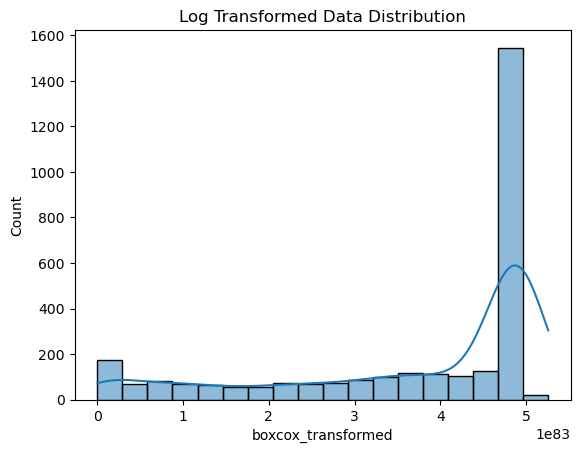

In [489]:
from scipy import stats
dp_df2['boxcox_transformed'], _ = stats.boxcox(dp_df2['fraud_score'] + abs(dp_df2['fraud_score'].min()) + 1)  # To avoid negative values


sns.histplot(dp_df2['fraud_score'], kde=True)
plt.title('Original Data Distribution')
plt.show()

sns.histplot(dp_df2['boxcox_transformed'], kde=True)
plt.title('Log Transformed Data Distribution')
plt.show()

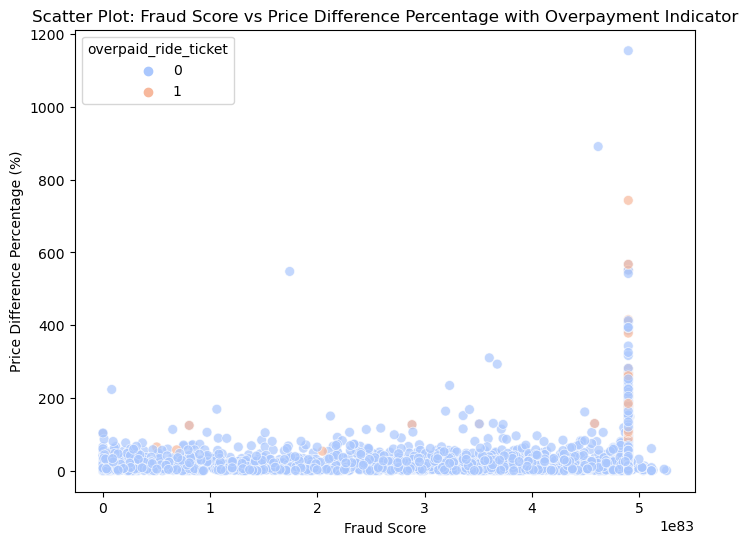

In [493]:

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dp_df2, x='boxcox_transformed', y='price_diff_pct', hue='overpaid_ride_ticket', palette='coolwarm', s=50, alpha=0.7)

plt.title('Scatter Plot: Fraud Score vs Price Difference Percentage with Overpayment Indicator')
plt.xlabel('Fraud Score')
plt.ylabel('Price Difference Percentage (%)')
plt.show()


                         change_reason_pricing  price_diff_pct
0  change has not affected the predicted price       16.480339
1                   client_destination_changed       53.610792


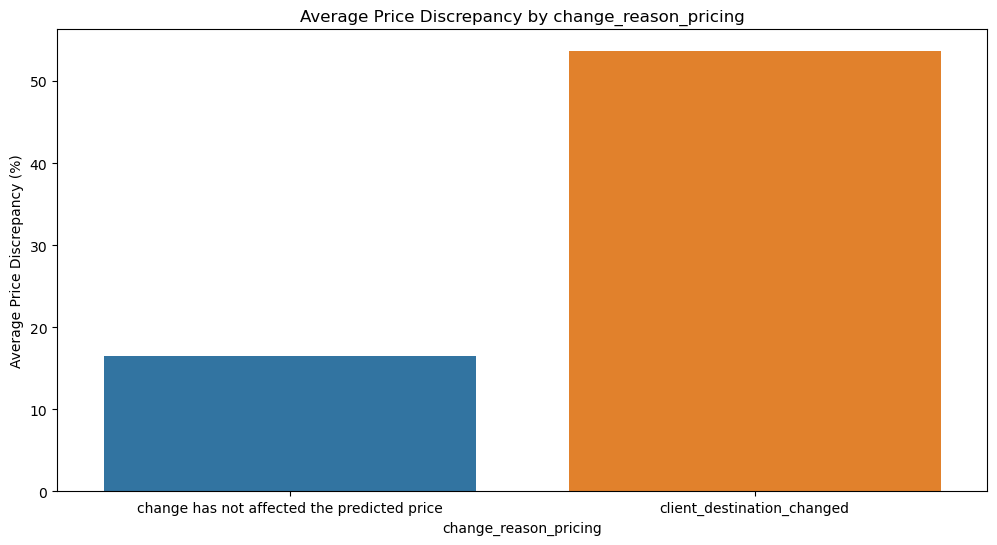

In [448]:
dest_change_discrepancy = dp_df2.groupby('change_reason_pricing')['price_diff_pct'].median().reset_index(drop=False)
print(dest_change_discrepancy)
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=dest_change_discrepancy, x='change_reason_pricing', y='price_diff_pct')
plt.title('Average Price Discrepancy by change_reason_pricing')
plt.xlabel('change_reason_pricing')
plt.ylabel('Average Price Discrepancy (%)')
plt.show()

   discrepancy_flag  price_diff_pct
0             False            2881
1              True            1370


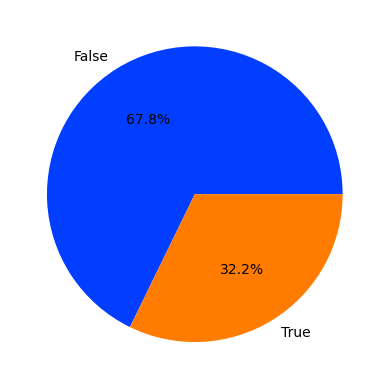

In [411]:
discrepency = dp_df2.groupby('discrepancy_flag')['price_diff_pct'].count().reset_index(drop=False)
print(discrepency)
colors = sns.color_palette('bright')[0:4]

# Create pie chart
plt.pie(discrepency['price_diff_pct'], labels=discrepency['discrepancy_flag'], colors=colors, autopct='%1.1f%%')
plt.show()

  calc_created_Weekday  price_diff_pct
0               Friday       16.385000
1               Monday       20.294118
2             Saturday       10.746269
3               Sunday       14.216028
4             Thursday       16.859795
5              Tuesday       21.538462
6            Wednesday       17.460317


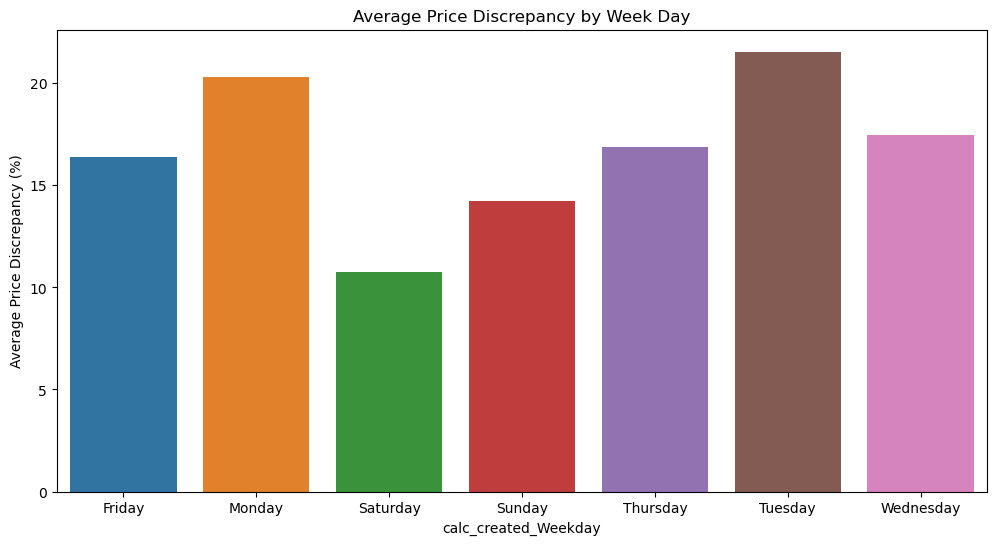

In [446]:
Week_Day_discrepancy = dp_df2.groupby('calc_created_Weekday')['price_diff_pct'].median().reset_index(drop=False)
print(Week_Day_discrepancy)
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=Week_Day_discrepancy, x='calc_created_Weekday', y='price_diff_pct')
plt.title('Average Price Discrepancy by Week Day')
plt.xlabel('calc_created_Weekday')
plt.ylabel('Average Price Discrepancy (%)')
plt.show()

  time_of_day  price_diff_pct
0   Afternoon       19.910714
1     Evening       20.505474
2     Morning       18.214286
3       Night       12.782615


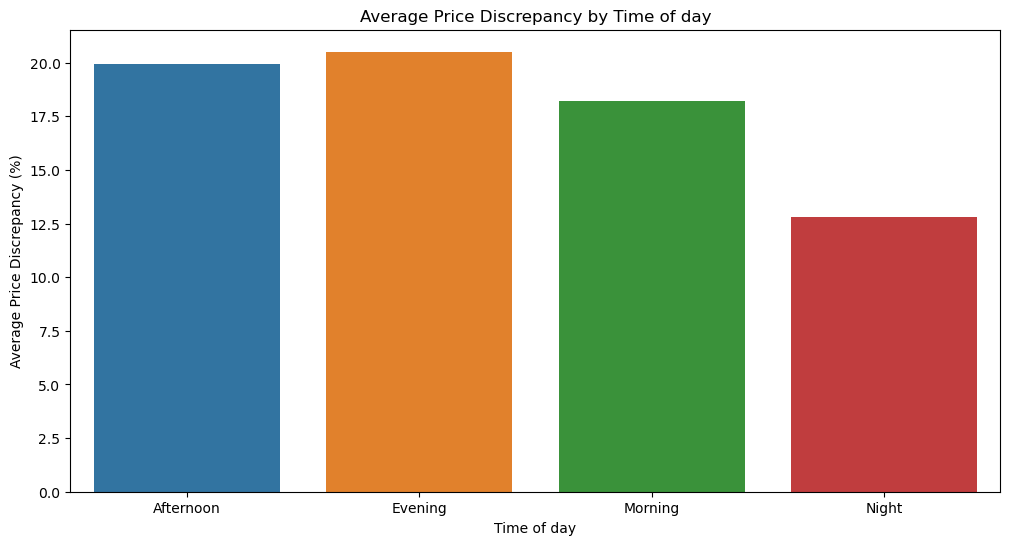

In [447]:
Time_of_day_discrepancy = dp_df2.groupby('time_of_day')['price_diff_pct'].median().reset_index(drop=False)
print(Time_of_day_discrepancy)
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=Time_of_day_discrepancy, x='time_of_day', y='price_diff_pct')
plt.title('Average Price Discrepancy by Time of day')
plt.xlabel('Time of day')
plt.ylabel('Average Price Discrepancy (%)')
plt.show()

# Pre procees in for data model

In [379]:
def one_hot_encoding(df,col,prefix):
    df=df.copy()
    dummies=pd.get_dummies(df[col],prefix=prefix,dtype=int)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(col,axis=1)
    return df

In [380]:
def preprocessing(df):
    df=df.copy()
    df=df.drop(['b_state','order_try_state','order_state'],axis=1)
    #
    df['entered_by']=df['entered_by'].replace({'client':0,'driver':1})
    #One hot coding for the categorical data
    for col,prefix in[('prediction_price_type','pt'),('change_reason_pricing','ct'),('calc_created_Weekday',"wk_day"),('time_of_day',"td_day")]:
        df=one_hot_encoding(df,col,prefix)
    
    
    
    return df

In [381]:
{col: dp_df2[col].nunique() for col in dp_df2.select_dtypes('object').columns}


{'entered_by': 2,
 'b_state': 1,
 'prediction_price_type': 4,
 'change_reason_pricing': 4,
 'order_state': 2,
 'order_try_state': 1,
 'calc_created_Weekday': 7,
 'time_of_day': 4}

In [382]:
dp_df2=preprocessing(dp_df2)

In [383]:
dp_df2.head()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,dest_change_number,predicted_distance,...,wk_day_Monday,wk_day_Saturday,wk_day_Sunday,wk_day_Thursday,wk_day_Tuesday,wk_day_Wednesday,td_day_Afternoon,td_day_Evening,td_day_Morning,td_day_Night
0,22,22,4.04,10.00,2839,700,1,0,1,13384.0,...,0,0,1,0,0,0,0,0,0,1
1,618,618,6.09,3.60,5698,493,1,0,1,2286.0,...,0,1,0,0,0,0,0,0,0,1
2,657,657,4.32,3.50,4426,695,1,0,1,4101.0,...,0,1,0,0,0,0,0,0,1,0
3,313,313,72871.72,72871.72,49748,1400,0,0,2,3017.0,...,0,0,0,0,0,1,0,0,1,0
4,1176,1176,20032.50,19500.00,10273,5067,1,0,1,14236.0,...,0,0,0,1,0,0,0,1,0,0


In [384]:
Y=dp_df2['upfront_price']
X=dp_df2.drop(['upfront_price'],axis=1)
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, test_size=0.3, random_state=1,shuffle=True)


In [385]:
model =LinearRegression()

model.fit(X_Train, Y_Train)

LinearRegression()

In [386]:
y_pred = model.predict(X_Test)


In [387]:
rmse = mean_squared_error(Y_Test, y_pred, squared=False)
print("Model test R2 Scroe: {:.5f}".format(model.score(X_Test,Y_Test)))

Model test R2 Scroe: 0.80219
